<a href="https://colab.research.google.com/github/owenfink9/covid19/blob/master/covid_19_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(suppress=True)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving covid_kaggle.xlsx to covid_kaggle.xlsx


In [4]:
covid = pd.read_excel("covid_kaggle.xlsx")

In [5]:
covid.shape

(5644, 111)

# 1. Data Wash

Remove test results for other viruses, we'd like to predict the SARS-Cov-2 test result.

In [6]:
covid = covid.drop(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Parainfluenza 1', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Influenza B, rapid test', 'Influenza A, rapid test'], axis=1)

Remove irrelvalent Features including patients ID and patients intention to the ward level.

In [7]:
covid = covid.drop(['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1)

Less than 100 patients among 5644 took urine tests.

In [8]:
urine_features = ['Urine - Esterase', 'Urine - Aspect', 'Urine - pH', 'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite', 'Urine - Density', 'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Sugar', 'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Red blood cells', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color']

In [9]:
covid = covid.drop(urine_features, axis=1)

Less than 100 patients among 5644 took aerial blood gas tests.

In [10]:
arterial_blood_gas_features = ['Hb saturation (arterial blood gases)', 'pCO2 (arterial blood gas analysis)', 'Base excess (arterial blood gas analysis)', 'pH (arterial blood gas analysis)', 'Total CO2 (arterial blood gas analysis)', 'HCO3 (arterial blood gas analysis)', 'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor', 'ctO2 (arterial blood gas analysis)']

In [11]:
covid = covid.drop(arterial_blood_gas_features, axis=1)

Reamove features containing less than 100 patients' records

In [12]:
i = 0
for column in covid:
    if (covid[column].count() < 100):
        print(column, covid[column].count())
        covid = covid.drop(column, axis=1)

Mycoplasma pneumoniae 0
Ionized calcium  50
Magnesium 40
Fio2 (venous blood gas analysis) 1
Rods # 97
Segmented 97
Promyelocytes 97
Metamyelocytes 97
Myelocytes 97
Myeloblasts 97
Partial thromboplastin time (PTT)  0
Relationship (Patient/Normal) 91
Prothrombin time (PT), Activity 0
Vitamin B12 3
Ferritin 23
Arterial Lactic Acid 27
Lipase dosage 8
D-Dimer 0
Albumin 13


Drop constant features

In [13]:
covid = covid.loc[:,covid.apply(pd.Series.nunique) != 1]

Drop features has least patients' records

In [14]:
features = list(covid.columns)
sorted_features = [x for _,x in sorted(zip(covid[features].count(), features))]

In [15]:
# [ [covid.columns.get_loc(c), c] for c in sorted_features if c in covid]

Now all features contain at least 100 patients' record

In [16]:
covid_init = covid[sorted_features[-1]]
for i in reversed(range(0, len(sorted_features))):
    print(sorted_features[i], covid[sorted_features[i]].count())

SARS-Cov-2 exam result 5644
Patient age quantile 5644
Hemoglobin 603
Hematocrit 603
Red blood cell distribution width (RDW) 602
Red blood Cells 602
Platelets 602
Mean corpuscular volume (MCV) 602
Mean corpuscular hemoglobin concentration (MCHC) 602
Mean corpuscular hemoglobin (MCH) 602
Lymphocytes 602
Leukocytes 602
Eosinophils 602
Basophils 602
Monocytes 601
Mean platelet volume  599
Neutrophils 513
Proteina C reativa mg/dL 506
Creatinine 424
Urea 397
Potassium 371
Sodium 370
Strepto A 332
Aspartate transaminase 226
Alanine transaminase 225
Serum Glucose 208
Total Bilirubin 182
Indirect Bilirubin 182
Direct Bilirubin 182
Gamma-glutamyltransferase  153
Alkaline phosphatase 144
pO2 (venous blood gas analysis) 136
pH (venous blood gas analysis) 136
pCO2 (venous blood gas analysis) 136
Total CO2 (venous blood gas analysis) 136
Hb saturation (venous blood gas analysis) 136
HCO3 (venous blood gas analysis) 136
Base excess (venous blood gas analysis) 136
International normalized ratio (INR) 

In [17]:
removed_features = ['Lactic Dehydrogenase', 'Creatine phosphokinase\xa0(CPK)\xa0', 'International normalized ratio (INR)', 'Base excess (venous blood gas analysis)', 'HCO3 (venous blood gas analysis)', 'Hb saturation (venous blood gas analysis)', 'Total CO2 (venous blood gas analysis)', 'pCO2 (venous blood gas analysis)', 'pH (venous blood gas analysis)', 'pO2 (venous blood gas analysis)', 'Alkaline phosphatase', 'Gamma-glutamyltransferase\xa0', 'Direct Bilirubin', 'Indirect Bilirubin', 'Total Bilirubin', 'Serum Glucose', 'Alanine transaminase', 'Aspartate transaminase', 'Strepto A', 'Sodium', 'Potassium', 'Urea', 'Creatinine']

In [18]:
covid = covid.drop(removed_features, axis=1)

In [19]:
covid.shape

(5644, 18)

Drop patients that have less than 10 records

In [20]:
for index, row in covid.iterrows():
    if row.count() < 10:
        covid.drop(index, inplace=True)

Now we have more than 500 records

In [21]:
features = list(covid.columns)
sorted_features = [x for _,x in sorted(zip(covid[features].count(), features))]
for i in reversed(range(0, len(sorted_features))):
    print(sorted_features[i], covid[sorted_features[i]].count())

SARS-Cov-2 exam result 602
Red blood cell distribution width (RDW) 602
Red blood Cells 602
Platelets 602
Patient age quantile 602
Mean corpuscular volume (MCV) 602
Mean corpuscular hemoglobin concentration (MCHC) 602
Mean corpuscular hemoglobin (MCH) 602
Lymphocytes 602
Leukocytes 602
Hemoglobin 602
Hematocrit 602
Eosinophils 602
Basophils 602
Monocytes 601
Mean platelet volume  599
Neutrophils 513
Proteina C reativa mg/dL 502


Drop NaN

In [22]:
covid = covid.dropna()

Map classification string to 0-1

In [23]:
covid['SARS-Cov-2 exam result'] = covid['SARS-Cov-2 exam result'].map({'positive': 1, 'negative': 0})

In [24]:
covid.shape

(420, 18)

# 2. Train test split

In [25]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [26]:
y = covid["SARS-Cov-2 exam result"].to_numpy()

In [27]:
X = covid
X = X.drop(["SARS-Cov-2 exam result"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1)

In [28]:
X_train.shape

(294, 17)

In [29]:
X_test.shape

(126, 17)

In [30]:
y_test

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [31]:
print(np.sum(y_test), "positive among", len(y_test), 'patients')

18 positive among 126 patients


# SMOTE

In [32]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_smote_train, y_smote_train = os.fit_resample(X_train, y_train)

In [34]:
print(np.sum(y_smote_train), "positive among", len(y_smote_train), 'patients')

253 positive among 506 patients


# 3. Feature Selection

### 3.1 Basic Methods

#### 3.1.1 Drop constant and Quasi-constant features

In [35]:
from sklearn.feature_selection import VarianceThreshold

In [36]:
def drop_features(X_train, X_test, threshhold):
    sel = VarianceThreshold(threshold=threshhold)
    sel.fit(X_train)
    print("No. of constant features:",
        len([
            x for x in X_train.columns
            if x not in X_train.columns[sel.get_support()]
        ])
    )
    constant_features = [x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

    print(constant_features)
    X_train.drop(labels=constant_features, axis=1, inplace=True)
    X_test.drop(labels=constant_features, axis=1, inplace=True)

In [37]:
drop_features(X_train, X_test, 0.01)
drop_features(X_smote_train, X_test, 0.01)

No. of constant features: 0
[]
No. of constant features: 0
[]


#### 3.1.2 Drop Duplicated Features

In [38]:
covid_t = covid.T
print("No. of Duplicated Features:", covid_t.duplicated().sum())
print(covid_t[covid_t.duplicated()].index.values)

No. of Duplicated Features: 0
[]


### 3.2 Correlations

In [39]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat

,feature1,feature2,corr
0,Hematocrit,Hemoglobin,0.969368
1,Hemoglobin,Hematocrit,0.969368
2,Lymphocytes,Neutrophils,0.930390
3,Neutrophils,Lymphocytes,0.930390
4,Hematocrit,Red blood Cells,0.922796
5,Red blood Cells,Hematocrit,0.922796
6,Red blood Cells,Hemoglobin,0.900011
7,Hemoglobin,Red blood Cells,0.900011
8,Mean corpuscular hemoglobin (MCH),Mean corpuscular volume (MCV),0.856345
9,Mean corpuscular volume (MCV),Mean corpuscular hemoglobin (MCH),0.856345


In [40]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 3 correlated groups
out of 17 total features


In [41]:
# now we can visualise each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

     feature1         feature2      corr
0  Hematocrit       Hemoglobin  0.969368
4  Hematocrit  Red blood Cells  0.922796

      feature1     feature2     corr
2  Lymphocytes  Neutrophils  0.93039

                            feature1                       feature2      corr
8  Mean corpuscular hemoglobin (MCH)  Mean corpuscular volume (MCV)  0.856345



In [42]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [43]:
corr_features = list((correlation(X_train, 0.8)))
print(corr_features)

['Red blood Cells', 'Mean corpuscular volume (MCV)', 'Hemoglobin']


In [44]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_smote_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

In [45]:
X_train.shape, X_smote_train.shape, X_test.shape

((294, 14), (506, 14), (126, 14))

### 3.3 Statistical Methods

#### 3.3.1 Mutual Information

In [46]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [47]:
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns

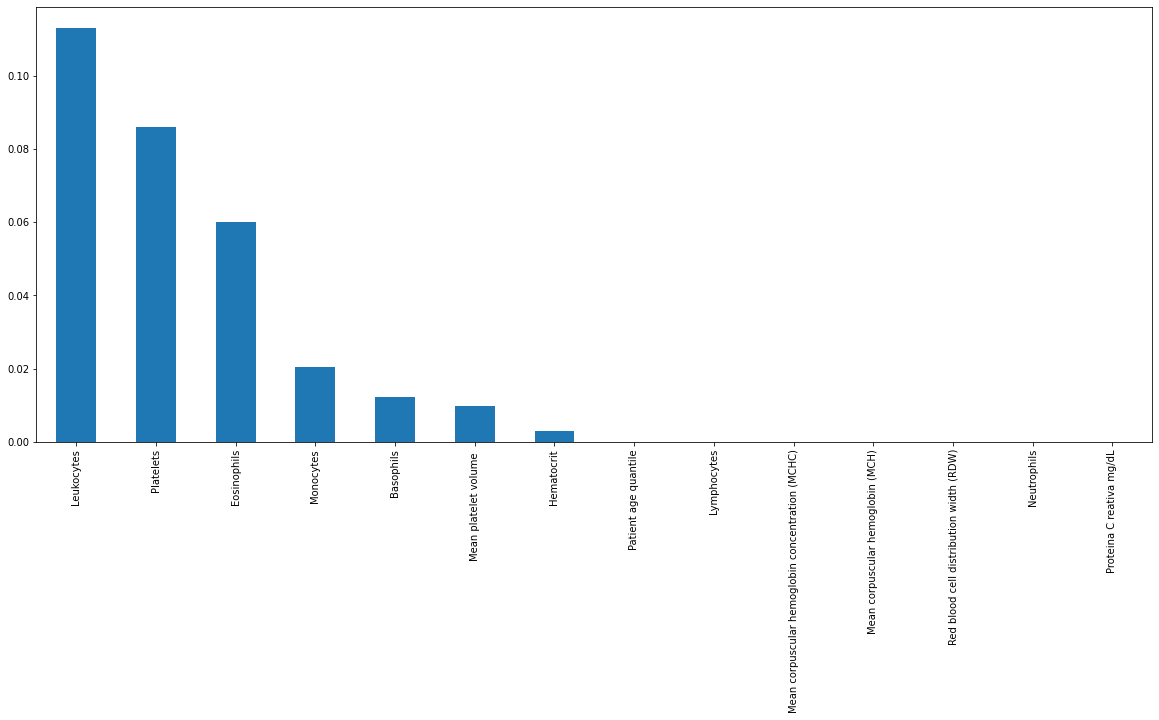

In [48]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [49]:
sel_ = SelectKBest(mutual_info_classif, k = 10).fit(X_train, y_train)
sel_smote_ = SelectKBest(mutual_info_classif, k = 10).fit(X_smote_train, y_smote_train)

In [50]:
mi_features = list(X_train.columns[ ~ sel_.get_support()].values)
mi_features_smote = list(X_smote_train.columns[ ~ sel_.get_support()].values)

In [51]:
mi_features

['Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Mean corpuscular hemoglobin (MCH)',
 'Neutrophils']

In [52]:
mi_features_smote

['Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Mean corpuscular hemoglobin (MCH)',
 'Neutrophils']

In [53]:
X_train.drop(labels=mi_features, axis=1, inplace=True)
X_smote_train.drop(labels=mi_features_smote, axis=1, inplace=True)
X_test.drop(labels=mi_features, axis=1, inplace=True)

In [54]:
X_train.shape

(294, 10)

In [55]:
X_smote_train.shape

(506, 10)

In [56]:
X_test.shape

(126, 10)

# 3. Classifier

In [57]:
import sklearn
import sklearn.ensemble
import sklearn.metrics
import xgboost as xgb

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
def cv_score(classifier, X, y, scoring):
    return cross_val_score(classifier, X, y, cv=5, scoring=scoring)

## 3.1.1 Decision Tree - Original

In [60]:
dt = sklearn.tree.DecisionTreeClassifier()

dt_f1 = cv_score(dt, X_train, y_train, 'f1')

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
print(np.mean(dt_f1))

0.4401579930217701


In [62]:
dt_pred = dt.predict(X_test)

print("Decision Tree")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, dt_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_pred))

Decision Tree
Precision:  0.8095238095238095
Recal:  0.4444444444444444
F1:  0.39999999999999997


In [63]:
print('Prediction:', ' '.join(str(e) for e in dt_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


## 3.1.2 Decision Tree - SMOTE

In [64]:
dt_smote = sklearn.tree.DecisionTreeClassifier()

dt_smote_f1 = cv_score(dt_smote, X_smote_train, y_smote_train, 'f1')

dt_smote.fit(X_smote_train, y_smote_train)

DecisionTreeClassifier()

In [65]:
print(np.mean(dt_smote_f1))

0.9099274258793683


In [66]:
dt_smote_pred = dt.predict(X_test)

print("Decision Tree")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, dt_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_smote_pred))

Decision Tree
Precision:  0.8095238095238095
Recal:  0.4444444444444444
F1:  0.39999999999999997


In [67]:
print('Prediction:', ' '.join(str(e) for e in dt_smote_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


## 3.2.1 Random Forests - Original

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

rf_f1 = cv_score(rf, X_train, y_train, 'f1')

rf.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
print(np.mean(rf_f1))

0.36029304029304027


In [71]:
rf_pred = rf.predict(X_test)

print("Random Forest")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, rf_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_pred))

Random Forest
Precision:  0.8650793650793651
Recal:  0.2777777777777778
F1:  0.3703703703703704


In [72]:
print('Prediction:', ' '.join(str(e) for e in rf_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


## 3.2.2 Random Forests - SMOTE

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf_smote = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

rf_smote_f1 = cv_score(rf_smote, X_smote_train, y_smote_train, 'f1')

rf_smote.fit(X_smote_train, y_smote_train)

RandomForestClassifier()

In [75]:
print(np.mean(rf_smote_f1))

0.952513900640489


In [76]:
rf_smote_pred = rf_smote.predict(X_test)

print("Random Forest")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, rf_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_smote_pred))

Random Forest
Precision:  0.9365079365079365
Recal:  0.7222222222222222
F1:  0.7647058823529411


In [77]:
print('Prediction:', ' '.join(str(e) for e in rf_smote_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


# 3.3.1 XGBoost - Original

In [78]:
# Create a model
# Params from: https://www.kaggle.com/aharless/swetha-s-xgboost-revised
xgbc = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    objective = 'binary:logistic',
    use_label_encoder=False,
    eval_metric='error'
)

xgbc_f1 = cv_score(xgbc, np.array(X_train), np.array(y_train), 'f1')

# Fit the models
xgbc.fit(np.array(X_train), np.array(y_train))

XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.7, eval_metric='error',
              max_depth=4, min_child_weight=0, reg_alpha=4, scale_pos_weight=9,
              subsample=0.8, use_label_encoder=False)

In [79]:
xgbc_pred = xgbc.predict(np.array(X_test))

print("XGBoost")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, xgbc_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_pred))

XGBoost
Precision:  0.8650793650793651
Recal:  0.7222222222222222
F1:  0.6046511627906976


In [80]:
print(np.mean(xgbc_f1))

0.5887344960867642


In [81]:
print('Prediction:', ' '.join(str(e) for e in xgbc_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


# 3.3.2 XGBoost - SMOTE

In [82]:
# Create a model
# Params from: https://www.kaggle.com/aharless/swetha-s-xgboost-revised
xgbc_smote = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    objective = 'binary:logistic',
    use_label_encoder=False,
    eval_metric='error'
)

xgbc_smote_f1 = cv_score(xgbc_smote, np.array(X_smote_train), np.array(y_smote_train), 'f1')

# Fit the models
xgbc_smote.fit(np.array(X_smote_train), np.array(y_smote_train))

XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.7, eval_metric='error',
              max_depth=4, min_child_weight=0, reg_alpha=4, scale_pos_weight=9,
              subsample=0.8, use_label_encoder=False)

In [83]:
xgbc_smote_pred = xgbc_smote.predict(np.array(X_test))

print("XGBoost")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, xgbc_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_smote_pred))

XGBoost
Precision:  0.8174603174603174
Recal:  0.7777777777777778
F1:  0.5490196078431373


In [84]:
print(np.mean(xgbc_smote_f1))

0.9134169418090229


In [85]:
print('Prediction:', ' '.join(str(e) for e in xgbc_smote_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


## 3.4.1 Neural Networks - Original

In [86]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [87]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [88]:
def build_classifier() :
    nn = Sequential()
    nn.add(Dense(activation='relu', input_dim=X_train.shape[1], units=10))
    nn.add(Dropout(rate = 0.1))
    nn.add(Dense(kernel_initializer="uniform", activation='relu', units=15))
    nn.add(Dropout(rate = 0.1))
    nn.add(Dense(kernel_initializer="uniform", activation='relu', units=5))
    nn.add(Dropout(rate = 0.1))
    nn.add(Dense(kernel_initializer='uniform',activation='sigmoid', units=1))
    nn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    return nn

In [89]:
nn = KerasClassifier(build_fn=build_classifier, epochs=200, batch_size=50, verbose=0)
# nn = build_classifier();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [90]:
history = nn.fit(X_train, y_train, batch_size=50, epochs=200, validation_split = 0.5) #verbose = 2

In [91]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     |████████████████████████████████| 106 kB 4.3 MB/s 


In [92]:
nn_results = PermutationImportance(nn, cv="prefit").fit(X_train, y_train)
nn_importance = nn_results.feature_importances_

In [93]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


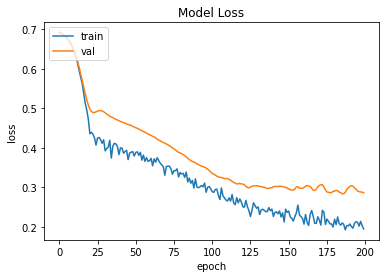

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'],loc='upper left')
plt.show()

In [95]:
nn_f1 = cv_score(nn, X_train, y_train, 'f1')

In [96]:
print(np.mean(nn_f1))

0.3350226244343891


In [97]:
nn_pred = nn.predict(X_test)
nn_pred[nn_pred > 0.5] = 1
nn_pred[nn_pred <= 0.5] = 0

print("NN")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, nn_pred))
print("Recall: ", sklearn.metrics.recall_score(y_test, nn_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, nn_pred))

NN
Precision:  0.8571428571428571
Recall:  0.0
F1:  0.0


In [98]:
print('Prediction:', ' '.join(str(e[0]) for e in nn_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


## 3.4.2 Neural Networks - SMOTE

In [99]:
def build_classifier() :
    nn = Sequential()
    nn.add(Dense(activation='relu', input_dim=X_smote_train.shape[1], units=10))
    nn.add(Dropout(rate = 0.1))
    nn.add(Dense(kernel_initializer="uniform", activation='relu', units=15))
    nn.add(Dropout(rate = 0.1))
    nn.add(Dense(kernel_initializer="uniform", activation='relu', units=5))
    nn.add(Dropout(rate = 0.1))
    nn.add(Dense(kernel_initializer='uniform',activation='sigmoid', units=1))
    nn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    return nn

In [100]:
nn_smote = KerasClassifier(build_fn=build_classifier, epochs=200, batch_size=50, verbose=0)
# nn = build_classifier();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [101]:
history_smote = nn_smote.fit(X_smote_train, y_smote_train, batch_size=50, epochs=200, validation_split = 0.5) #verbose = 2

In [102]:
nn_smote_results = PermutationImportance(nn_smote, cv="prefit").fit(X_smote_train, y_smote_train)
nn_smote_importance = nn_smote_results.feature_importances_

In [103]:
print(history_smote.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


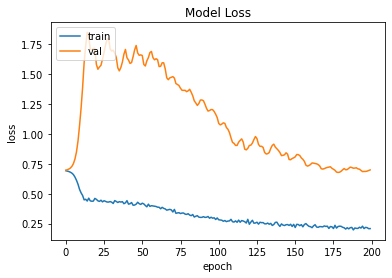

In [104]:
plt.plot(history_smote.history['loss'])
plt.plot(history_smote.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'],loc='upper left')
plt.show()

In [105]:
nn_smote_f1 = cv_score(nn_smote, X_smote_train, y_smote_train, 'f1')

In [106]:
print(np.mean(nn_smote_f1))

0.8351160862354892


In [107]:
nn_smote_pred = nn_smote.predict(X_test)
nn_smote_pred[nn_smote_pred > 0.5] = 1
nn_smote_pred[nn_smote_pred <= 0.5] = 0

print("NN")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, nn_smote_pred))
print("Recall: ", sklearn.metrics.recall_score(y_test, nn_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, nn_smote_pred))

NN
Precision:  0.8571428571428571
Recall:  0.0
F1:  0.0


In [108]:
print('Prediction:', ' '.join(str(e[0]) for e in nn_smote_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


# 3.5.1 Logistic Regression - Original

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()

lr_f1 = cv_score(lr, X_train, y_train, 'f1')

lr.fit(X_train, y_train)

LogisticRegression()

In [110]:
print(np.mean(lr_f1))

0.49333333333333335


In [111]:
lr_pred = lr.predict(X_test)

print("Decision Tree")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, lr_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, lr_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, lr_pred))

Decision Tree
Precision:  0.8968253968253969
Recal:  0.4444444444444444
F1:  0.5517241379310345


In [112]:
print('Prediction:', ' '.join(str(e) for e in lr_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


# 3.5.2 Logistic Regression - SMOTE

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_smote = LogisticRegression()

lr_smote_f1 = cv_score(lr_smote, X_smote_train, y_smote_train, 'f1')

lr_smote.fit(X_smote_train, y_smote_train)

LogisticRegression()

In [114]:
print(np.mean(lr_smote_f1))

0.9111319818008399


In [115]:
lr_smote_pred = lr_smote.predict(X_test)

print("Decision Tree")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, lr_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, lr_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, lr_smote_pred))

Decision Tree
Precision:  0.8253968253968254
Recal:  0.7777777777777778
F1:  0.56


In [116]:
print('Prediction:', ' '.join(str(e) for e in lr_smote_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0


# 4. Prediction

In [117]:
import math

In [162]:
print("Decision Tree - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, dt_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, dt_pred)) * (sklearn.metrics.accuracy_score(y_test, dt_pred))) / len(X_test)))

print()

print("Decision Tree - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, dt_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, dt_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, dt_smote_pred))) / len(X_test)))

print()

print("Random Forest - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, rf_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, rf_pred)) * (sklearn.metrics.accuracy_score(y_test, rf_pred))) / len(X_test)))

print()

print("Random Forest - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, rf_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, rf_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, rf_smote_pred))) / len(X_test)))

print()

print("XGBoost - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, xgbc_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, xgbc_pred)) * (sklearn.metrics.accuracy_score(y_test, xgbc_pred))) / len(X_test)))

print()

print("XGBoost - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, xgbc_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred))) / len(X_test)))

print()

print("NN - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, nn_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, nn_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, nn_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, nn_pred)) * (sklearn.metrics.accuracy_score(y_test, nn_pred))) / len(X_test)))

print()

print("NN - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, nn_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, nn_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, nn_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, nn_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, nn_smote_pred))) / len(X_test)))

print()

print("LR - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, lr_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, lr_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, lr_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, lr_pred)) * (sklearn.metrics.accuracy_score(y_test, lr_pred))) / len(X_test)))

print()

print("LR - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, lr_smote_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, lr_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, lr_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, lr_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, lr_smote_pred))) / len(X_test)))

print()

print("Stacking")
print("Precision: ", sklearn.metrics.accuracy_score(true_output, stack_pred))
print("Recal: ", sklearn.metrics.recall_score(true_output, stack_pred))
print("F1: ", sklearn.metrics.f1_score(true_output, stack_pred))

Decision Tree - Original
Precision:  0.8095238095238095
Recal:  0.4444444444444444
F1:  0.39999999999999997
CI: 0.06856554942462893

Decision Tree - SMOTE
Precision:  0.8095238095238095
Recal:  0.4444444444444444
F1:  0.39999999999999997
CI: 0.06856554942462893

Random Forest - Original
Precision:  0.8650793650793651
Recal:  0.2777777777777778
F1:  0.3703703703703704
CI: 0.059653779328748456

Random Forest - SMOTE
Precision:  0.9365079365079365
Recal:  0.7222222222222222
F1:  0.7647058823529411
CI: 0.04257809737244419

XGBoost - Original
Precision:  0.8650793650793651
Recal:  0.7222222222222222
F1:  0.6046511627906976
CI: 0.059653779328748456

XGBoost - SMOTE
Precision:  0.8174603174603174
Recal:  0.7777777777777778
F1:  0.5490196078431373
CI: 0.06745012891211277

NN - Original
Precision:  0.8571428571428571
Recal:  0.0
F1:  0.0
CI: 0.06110100926607787

NN - SMOTE
Precision:  0.8571428571428571
Recal:  0.0
F1:  0.0
CI: 0.06110100926607787

LR - Original
Precision:  0.8968253968253969
R

In [163]:
print('Original:')
print(' Decision Tree:', ' '.join(str(e) for e in dt_pred))
print(' Random Forest:', ' '.join(str(e) for e in rf_pred))
print('       XGBoost:', ' '.join(str(e) for e in xgbc_pred))
print('Neural Network:', ' '.join(str(e[0]) for e in nn_pred))
print('  Logistic Reg:', ' '.join(str(e) for e in lr_pred))
print()
print('SMOTE:')
print(' Decision Tree:', ' '.join(str(e) for e in dt_smote_pred))
print(' Random Forest:', ' '.join(str(e) for e in rf_smote_pred))
print('       XGBoost:', ' '.join(str(e) for e in xgbc_smote_pred))
print('Neural Network:', ' '.join(str(e[0]) for e in nn_smote_pred))
print('  Logistic Reg:', ' '.join(str(e) for e in lr_smote_pred))
print()
print('      Stacking:', ' '.join(str(e) for e in stack_pred))
print('         Truth:', ' '.join(str(e) for e in y_test))

Original:
 Decision Tree: 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0
 Random Forest: 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
       XGBoost: 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0
Neural Network: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

#FLAML

In [82]:
!pip install flaml

     |████████████████████████████████| 157 kB 5.4 MB/s 
     |████████████████████████████████| 2.0 MB 41.2 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [83]:
#rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

#rf_f1 = cv_score(rf, X_train, y_train, 'f1')

#rf.fit(X_train, y_train)
from flaml import AutoML

automl_clf = AutoML()
automl_f1 = cv_score(automl_clf, X_train, y_train, 'f1')
automl_clf.fit(X_train, y_train, task="classification", ) 

[flaml.automl: 04-04 03:24:54] {2105} INFO - task = classification
[flaml.automl: 04-04 03:24:54] {2107} INFO - Data split method: stratified
[flaml.automl: 04-04 03:24:54] {2111} INFO - Evaluation method: cv
[flaml.automl: 04-04 03:24:54] {2188} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 04-04 03:24:54] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 04-04 03:24:54] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 04-04 03:24:54] {2698} INFO - Estimated sufficient time budget=2985s. Estimated necessary time budget=69s.
[flaml.automl: 04-04 03:24:54] {2750} INFO -  at 0.4s,	estimator lgbm's best error=0.1640,	best estimator lgbm's best error=0.1640
[flaml.automl: 04-04 03:24:54] {2567} INFO - iteration 1, current learner lgbm
[flaml.automl: 04-04 03:24:55] {2750} INFO -  at 0.6s,	estimator lgbm's best error=0.1497,	best estimator lgbm's best error=0.1497
[flaml.automl: 04-04 03

In [84]:
flaml_pred = automl_clf.predict(np.array(X_test))
print("FLAML")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, flaml_pred))
print("Recal: ", sklearn.metrics.recall_score(y_test, flaml_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, flaml_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, flaml_pred)) * (sklearn.metrics.accuracy_score(y_test, flaml_pred))) / len(X_test)))

ValueError: ignored

# 5. Save Results

## 5.1 Save model

In [85]:
import pickle

In [86]:
with open("model/model-3_kaggle.pkl", 'wb') as f:
    pickle.dump([dt, rf, xgbc], f)
# with open("model-4.pkl", 'wb') as f:
#     pickle.dump([dt, rf, xgbc, nn], f)
with open("dataset/dataset_kaggle.pkl", 'wb') as f:
    pickle.dump([X_train, X_test, y_train, y_test], f)

FileNotFoundError: ignored

In [ ]:
nn.model.save('model/nn_kaggle.h5')

## 5.2 Load Model

In [ ]:
import keras
from keras.models import load_model

In [ ]:
nn = load_model("model/nn_kaggle.h5")

OSError: ignored

In [ ]:
with open("model/model-3_kaggle.pkl", 'rb') as f:
    [dt, rf, xgbc] = pickle.load(f)

In [ ]:
with open("dataset/dataset_kaggle.pkl", 'rb') as f:
    [X_train, X_test, y_train, y_test] = pickle.load(f)

# 6. Explain

## 6.3 Feature Importance

In [361]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [362]:
fi = {}
fi["dt"] = []
fi["rf"] = []
fi["xgbc"] = []
fi["nn"] = []

**Decition Tree**

In [363]:
dt_results = permutation_importance(dt, X_train, y_train, scoring='accuracy')
dt_importance = dt_results.importances_mean
for i,v in enumerate(dt_importance):
    if v != 0:
        fi["dt"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [364]:
fi["dt"] = sorted(fi["dt"], key=lambda x: x['value'], reverse=True)

**Random Forests**

In [365]:
rf_results = permutation_importance(rf, X_train, y_train, scoring='accuracy')
rf_importance = rf_results.importances_mean
for i,v in enumerate(rf_importance):
    if v != 0:
        fi["rf"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [366]:
fi["rf"] = sorted(fi["rf"], key=lambda x: x['value'], reverse=True)

**Gradient Boosted Tree**

In [367]:
xgbc_results = permutation_importance(xgbc, np.array(X_train), np.array(y_train), scoring='accuracy')
xgbc_importance = xgbc_results.importances_mean
for i,v in enumerate(xgbc_importance):
    if v != 0:
        fi["xgbc"].append({
            'name': X_train.columns[i],
            'value': v
        })

**Neural Networks**

In [368]:
for i,v in enumerate(nn_importance):
    if v != 0:
        fi["nn"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [369]:
fi["nn"] = sorted(fi["nn"], key=lambda x: x['value'], reverse=True)

**Summmary**

In [370]:
print("Decision Tree")
for i in fi["dt"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Decision Tree
Feature:           Leukocytes,	 Score: 0.024 	 Actual: 0.134
Feature:            Basophils,	 Score: 0.024 	 Actual: 0.085
Feature: Proteina C reativa mg/dL,	 Score: 0.024 	 Actual: 0.059
Feature:            Monocytes,	 Score: 0.024 	 Actual: 0.055
Feature:          Eosinophils,	 Score: 0.024 	 Actual: 0.049
Feature:           Hematocrit,	 Score: 0.024 	 Actual: 0.031
Feature: Mean corpuscular hemoglobin (MCH),	 Score: 0.024 	 Actual: 0.030
Feature:          Neutrophils,	 Score: 0.024 	 Actual: 0.025
Feature:            Platelets,	 Score: 0.024 	 Actual: 0.022
Feature: Red blood cell distribution width (RDW),	 Score: 0.024 	 Actual: 0.019


In [371]:
print("Random Forests")
for i in fi["rf"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Random Forests
Feature:           Leukocytes,	 Score: 0.024 	 Actual: 0.092
Feature:          Eosinophils,	 Score: 0.024 	 Actual: 0.035
Feature:            Monocytes,	 Score: 0.024 	 Actual: 0.031
Feature:            Platelets,	 Score: 0.024 	 Actual: 0.029
Feature: Proteina C reativa mg/dL,	 Score: 0.024 	 Actual: 0.014
Feature:           Hematocrit,	 Score: 0.024 	 Actual: 0.010
Feature: Red blood cell distribution width (RDW),	 Score: 0.024 	 Actual: 0.008
Feature:          Neutrophils,	 Score: 0.024 	 Actual: 0.004
Feature: Mean corpuscular hemoglobin (MCH),	 Score: 0.024 	 Actual: 0.003
Feature:            Basophils,	 Score: 0.024 	 Actual: 0.001


In [372]:
print("Gradient Boosted Trees")
for i in fi["xgbc"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Gradient Boosted Trees
Feature:           Hematocrit,	 Score: 0.024 	 Actual: 0.007
Feature:            Platelets,	 Score: 0.024 	 Actual: 0.015
Feature:           Leukocytes,	 Score: 0.024 	 Actual: 0.090
Feature:            Basophils,	 Score: 0.024 	 Actual: -0.003
Feature: Mean corpuscular hemoglobin (MCH),	 Score: 0.024 	 Actual: 0.005
Feature:          Eosinophils,	 Score: 0.024 	 Actual: 0.022
Feature:            Monocytes,	 Score: 0.024 	 Actual: 0.003
Feature: Red blood cell distribution width (RDW),	 Score: 0.024 	 Actual: 0.013
Feature:          Neutrophils,	 Score: 0.024 	 Actual: 0.008
Feature: Proteina C reativa mg/dL,	 Score: 0.024 	 Actual: 0.015


In [373]:
print("Neural Networks")
for i in fi["nn"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Neural Networks
Feature:           Leukocytes,	 Score: 0.024 	 Actual: 0.062
Feature:            Monocytes,	 Score: 0.024 	 Actual: 0.029
Feature:           Hematocrit,	 Score: 0.024 	 Actual: 0.026
Feature: Red blood cell distribution width (RDW),	 Score: 0.024 	 Actual: 0.026
Feature:          Eosinophils,	 Score: 0.024 	 Actual: 0.026
Feature: Proteina C reativa mg/dL,	 Score: 0.024 	 Actual: 0.024
Feature:            Platelets,	 Score: 0.024 	 Actual: 0.023
Feature:          Neutrophils,	 Score: 0.024 	 Actual: 0.022
Feature: Mean corpuscular hemoglobin (MCH),	 Score: 0.024 	 Actual: 0.019
Feature:            Basophils,	 Score: 0.024 	 Actual: 0.018


## 6.1 Partial Dependence Plot

In [100]:
from sklearn.inspection import plot_partial_dependence

In [101]:
X_train.columns

Index(['Patient age quantile', 'Hematocrit', 'Platelets',
       'Mean platelet volume ',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Monocytes'],
      dtype='object')

In [102]:
plot_partial_dependence(xgbc, X_train, [4]) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

In [103]:
nn._estimator_type = 'classifier'

In [104]:
plot_partial_dependence(xgbc, X_train, [3, 4])
fig = plt.gcf()
fig.subplots_adjust(hspace=0.3)
# fig.savefig("nn_pdp_crp_ntproBNP")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

In [105]:
covid[covid['SARS-Cov-2 exam result'] == 1]['Leukocytes'].mean()

-0.7965813644104085

In [106]:
covid[covid['SARS-Cov-2 exam result'] == 0]['Leukocytes'].mean()

-0.0010514440433713917

## 6.2 Individual Conditional Expectation (ICE)

In [107]:
def my_ice(model, X, feat_idx):
#     X = np.array(X)
    fmax, fmin = np.max(np.array(X)[:, feat_idx]), np.min(np.array(X)[:, feat_idx])
    frange = np.linspace(fmin, fmax, 100)
    preds = []
    for x in frange:
        X_ = X.copy()
        X_.iloc[:, feat_idx] = x
        pred = model.predict_proba(X_)
#         print(pred.shape)
        preds.append(pred[:, 1])
    return (frange, np.array(preds))

In [108]:
X_train.columns

Index(['Patient age quantile', 'Hematocrit', 'Platelets',
       'Mean platelet volume ',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Monocytes'],
      dtype='object')

In [109]:
LYM_data = my_ice(xgbc, X_train, 6)
CRP_data = my_ice(xgbc, X_train, 16)

ValueError: ignored

NameError: ignored

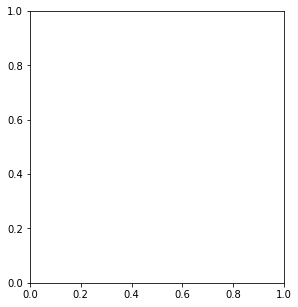

In [110]:
#           'axes.titlesize': 20}
# plt.rcParams.update(parameters)

f = plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(LYM_data[0], LYM_data[1])
plt.xlabel('NTproBNP')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylabel('Individual Conditional Expectation')

plt.subplot(122)
plt.plot(CRP_data[0], CRP_data[1])
plt.xlabel('CRP2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

f.savefig('nn_ice_crp_ntproBNP.png')


## 6.4 LIME

In [111]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE, weight='bold')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE, linewidth='3')     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [124]:
!pip install lime
from lime import lime_tabular

     |████████████████████████████████| 275 kB 3.7 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=1961ef2b46d2f3d580901e48fd851d3ef4589a21f6294d58cc366e88fa40514f
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [125]:
X_train.columns

Index(['Age', 'Hematocrit', 'Platelets', 'Mean platelet volume ', 'MCHC',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Monocytes'],
      dtype='object')

In [126]:
X_train = X_train.rename(columns={"Mean corpuscular hemoglobin concentration\xa0(MCHC)": "MCHC", "Proteina C reativa mg/dL": "CRP", "Patient age quantile":"Age"})

In [127]:
X_test.iloc[0]

Patient age quantile                                14.000000
Hematocrit                                           0.923173
Platelets                                           -1.258560
Mean platelet volume                                 0.796029
Mean corpuscular hemoglobin concentration (MCHC)    -0.652057
Leukocytes                                          -1.472092
Basophils                                           -1.140144
Mean corpuscular hemoglobin (MCH)                    0.282719
Eosinophils                                         -0.835508
Monocytes                                            0.961600
Name: 5111, dtype: float64

In [128]:
y_test[0]

1

**Desition Tree**

In [129]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', dt.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.0
True class: positive


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [131]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),  mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = xgbc.predict_proba, num_features = 5)

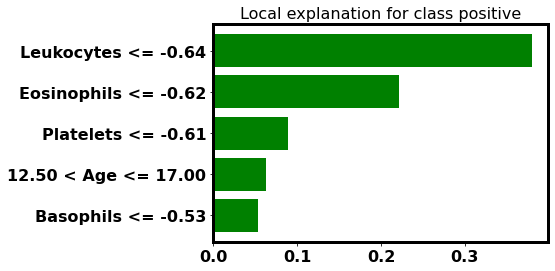

In [132]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [133]:
# exp.show_in_notebook(show_table=True, show_all=False)

**Random Forest**

In [134]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', rf.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.21
True class: positive


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [135]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), 
                                              feature_names= X_train.columns, class_names = class_names, 
                                              discretize_continuous=True)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = rf.predict_proba, num_features = 5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


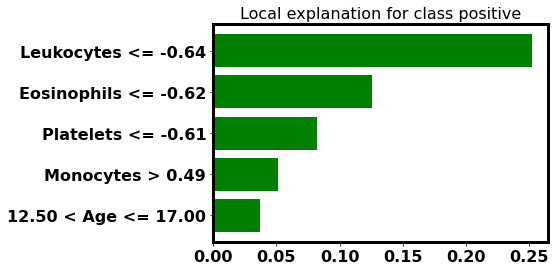

In [136]:
%matplotlib inline
fig = exp.as_pyplot_figure()

**XGBC**

In [137]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', xgbc.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.026407659
True class: positive


In [138]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),  mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = xgbc.predict_proba, num_features = 5)

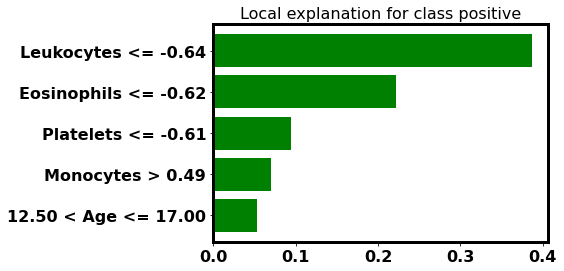

In [139]:
%matplotlib inline
fig = exp.as_pyplot_figure()

**NN**

In [140]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', nn.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.55791837
True class: positive


In [141]:
def predict_fn_nn(x_in):
    prob_severe = nn.predict(x_in)
    prob_normal = 1 - prob_severe
    print(np.concatenate((prob_normal, prob_severe), axis=1).shape)
    return np.array(np.concatenate((prob_normal, prob_severe), axis=1))

In [142]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = predict_fn_nn, num_features = 5)

(5000, 2)


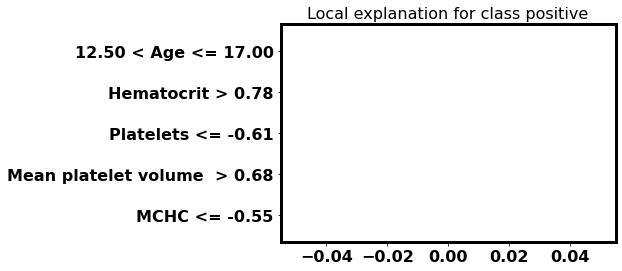

In [143]:
%matplotlib inline
fig = exp.as_pyplot_figure()

# Metrics

In [146]:
!pip install shap
import shap
shap.initjs()
!pip install alibi
from alibi.explainers import KernelShap

     |████████████████████████████████| 398 kB 5.5 MB/s 
     |████████████████████████████████| 3.8 MB 30.3 MB/s 
     |████████████████████████████████| 28.0 MB 164 kB/s 
     |████████████████████████████████| 462 kB 31.1 MB/s 
     |████████████████████████████████| 6.5 MB 9.5 MB/s 
     |████████████████████████████████| 596 kB 24.9 MB/s 
     |████████████████████████████████| 895 kB 27.2 MB/s 
     |████████████████████████████████| 67 kB 3.7 MB/s 
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.1.0-py2.py3-none-any.whl size=28052158 sha256=8b6c20ae2276e3248fa6478c778f5b47d6eb56ec73889e3aca255683ca914c52
  Stored in directory: /root/.cache/pip/wheels/b6/09/83/36dd0224ce32dcdf5e218b36362235ca2e50cece60a966ae1b
Successfully built spacy-lookups-data
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [148]:
!pip install aix360
from aix360.metrics import faithfulness_metric, monotonicity_metric

     |████████████████████████████████| 58.3 MB 24 kB/s 
     |████████████████████████████████| 109.3 MB 24 kB/s 
     |████████████████████████████████| 275 kB 29.6 MB/s 
     |████████████████████████████████| 109.7 MB 5.3 kB/s 
     |████████████████████████████████| 264 kB 26.1 MB/s 
     |████████████████████████████████| 377 kB 24.8 MB/s 
     |████████████████████████████████| 40 kB 3.4 MB/s 
     |████████████████████████████████| 50 kB 2.2 MB/s 
     |████████████████████████████████| 3.1 MB 28.8 MB/s 
     |████████████████████████████████| 488 kB 35.8 MB/s 
     |████████████████████████████████| 7.9 MB 31.0 MB/s 
     |████████████████████████████████| 121 kB 39.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for lime: filename=lime-0.1.1.37-py3-none-any.whl size=284290 sha256=cae2ab81481286f86c5bb0d6120510c0027fe4ebee3a6f4f026a22c1c566a800
  Stored in directory: /root/.ca

In [149]:
x = X_test.iloc[0, :]
base = np.zeros(x.shape[0])

**Random Forests**

lime

In [150]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), 
                                              feature_names= X_train.columns, class_names = class_names, 
                                              discretize_continuous=True)
ncases = X_test.shape[0]

i = 0
predicted_class = rf.predict(X_test)[i]

exp = explainer.explain_instance(np.array(X_test)[i, :], rf.predict_proba, num_features=5, top_labels=1)
le = exp.local_exp[predicted_class]

x = X_test.iloc[i]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]
fait = faithfulness_metric(rf, np.array(X_test)[i, :], coefs, base)
mon = monotonicity_metric(rf, np.array(X_test)[i, :], coefs, base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

Faithfulness metric mean:  0.6201894025089515
Monotonic True


shap

In [151]:
explainer = KernelShap(rf.predict_proba, feature_names=list(X_test.columns))
explainer.fit(X_train)
ncases = X_test.shape[0]

i = 0
explanation = explainer.explain(X_test.to_numpy()[i].reshape(1, -1))
fait = faithfulness_metric(rf, np.array(X_test)[i, :], explanation.shap_values[rf_pred[i]][0], base)
mon = monotonicity_metric(rf, np.array(X_test)[i, :], explanation.shap_values[rf_pred[i]][0], base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

Large datasets can cause slow runtimes for shap. The background dataset provided has 378 records. Consider passing a subset or allowing the algorithm to automatically summarize the data by setting the summarise_background=True orsetting summarise_background to 'auto' which will default to 300 samples!
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
Using 378 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

Faithfulness metric mean:  0.7967560473394097
Monotonic False


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


**Gradient Boosted Trees**

Lime

In [152]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), 
                                              feature_names= X_train.columns, class_names = ['normal', 'severe'], 
                                              discretize_continuous=True)
ncases = X_test.shape[0]
i = 0

predicted_class = xgbc_pred[i]

exp = explainer.explain_instance(np.array(X_test)[idx, :], xgbc.predict_proba, num_features = 10, top_labels=1)
le = exp.local_exp[1]

x = X_test.iloc[i]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]

fait = faithfulness_metric(xgbc, np.array(X_test)[i, :], coefs, base)
mon = monotonicity_metric(xgbc, np.array(X_test)[i, :], coefs, base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

Faithfulness metric mean:  0.7343236238410675
Monotonic False


SHAP

In [153]:
explainer = KernelShap(xgbc.predict_proba, feature_names=list(X_test.columns))
explainer.fit(X_train)

ncases = X_test.shape[0]

i = 0
explanation = explainer.explain(X_test.to_numpy()[i].reshape(1, -1))
fait = faithfulness_metric(xgbc, np.array(X_test)[i, :], explanation.shap_values[nn_pred[i][0]], base)
mon = monotonicity_metric(xgbc, np.array(X_test)[i, :], explanation.shap_values[nn_pred[i][0]], base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

Large datasets can cause slow runtimes for shap. The background dataset provided has 378 records. Consider passing a subset or allowing the algorithm to automatically summarize the data by setting the summarise_background=True orsetting summarise_background to 'auto' which will default to 300 samples!
Using 378 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

Faithfulness metric mean:  -0.8291341745151692
Monotonic False


**Neural Networks**

lime

In [154]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), 
                                              feature_names= X_train.columns, class_names = class_names,
                                              discretize_continuous=True)
ncases = X_test.shape[0]

i = 0

predicted_class = nn.predict(X_test)[i][0]

exp = explainer.explain_instance(np.array(X_test)[i, :], nn.predict_proba, num_features=10, top_labels=1)
le = exp.local_exp[predicted_class]

x = X_test.iloc[i]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]

fait = faithfulness_metric(nn, np.array(X_test)[i, :], coefs, base)
mon= monotonicity_metric(nn, np.array(X_test)[i, :], coefs, base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

Faithfulness metric mean:  -0.09253012810858997
Monotonic False


SHAP

In [155]:
explainer = KernelShap(rf.predict_proba, feature_names=list(X_test.columns))
explainer.fit(X_train)

ncases = X_test.shape[0]

i = 0

explanation = explainer.explain(X_test.to_numpy()[i].reshape(1, -1))
fait = faithfulness_metric(nn, np.array(X_test)[i, :], explanation.shap_values[nn_pred[i][0]], base)
mon = monotonicity_metric(nn, np.array(X_test)[i, :], explanation.shap_values[nn_pred[i][0]], base)

print("Faithfulness metric mean: ", fait)
print("Monotonic", mon)

Large datasets can cause slow runtimes for shap. The background dataset provided has 378 records. Consider passing a subset or allowing the algorithm to automatically summarize the data by setting the summarise_background=True orsetting summarise_background to 'auto' which will default to 300 samples!
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
Using 378 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Faithfulness metric mean:  0.17556984303230336
Monotonic False


# Stacking

In [143]:
X_stacking = pd.DataFrame(X_test.index)
rf_smote_pred_df = pd.DataFrame(rf_smote_pred)
xgbc_pred_df = pd.DataFrame(xgbc_pred)
xgbc_smote_pred_df = pd.DataFrame(xgbc_smote_pred)
lr_pred_df = pd.DataFrame(lr_pred)
lr_smote_pred_df = pd.DataFrame(lr_smote_pred)

In [144]:
X_stacking = pd.merge(X_stacking, rf_smote_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, xgbc_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, xgbc_smote_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, lr_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, lr_smote_pred_df, left_index=True, right_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  """


In [145]:
X_stacking.columns = ['id','Random_Forest_SMOTE','XGBoost','XGBoost_SMOTE','Logistic_Regression','Logistic_Regression_SMOTE']
X_stacking['Average'] = ( X_stacking['Random_Forest_SMOTE'] + X_stacking['XGBoost'] + X_stacking['XGBoost_SMOTE'] + X_stacking['Logistic_Regression'] + X_stacking['Logistic_Regression_SMOTE'] ) / 5

In [147]:
X_stacking['Prediction'] = [1 if x > 0.5 else 0 for x in X_stacking['Average']]

In [148]:
y_test_df = pd.DataFrame(y_test)
y_test_df.columns = ['True_Output']

stack_data = pd.merge(X_stacking, y_test_df, left_index=True, right_index=True)

In [149]:
stack_data

,id,Random_Forest_SMOTE,XGBoost,XGBoost_SMOTE,Logistic_Regression,Logistic_Regression_SMOTE,Average,Prediction,True_Output
0,5111,1,1,1,1,1,1.0,1,1
1,1862,0,0,0,0,0,0.0,0,0
2,71,0,1,1,0,1,0.6,1,0
3,2115,0,0,0,0,0,0.0,0,0
4,29,0,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
121,5201,1,0,1,0,1,0.6,1,1
122,2965,0,1,1,0,1,0.6,1,0
123,5004,1,1,1,1,1,1.0,1,1
124,4065,0,0,1,0,0,0.2,0,0


In [160]:
stack_pred = np.array(stack_data['Prediction'])
true_output = np.array(stack_data['True_Output'])

In [161]:
print("Stacking")
print("Precision: ", sklearn.metrics.accuracy_score(true_output, stack_pred))
print("Recal: ", sklearn.metrics.recall_score(true_output, stack_pred))
print("F1: ", sklearn.metrics.f1_score(true_output, stack_pred))

Stacking
Precision:  0.873015873015873
Recal:  0.7222222222222222
F1:  0.619047619047619
